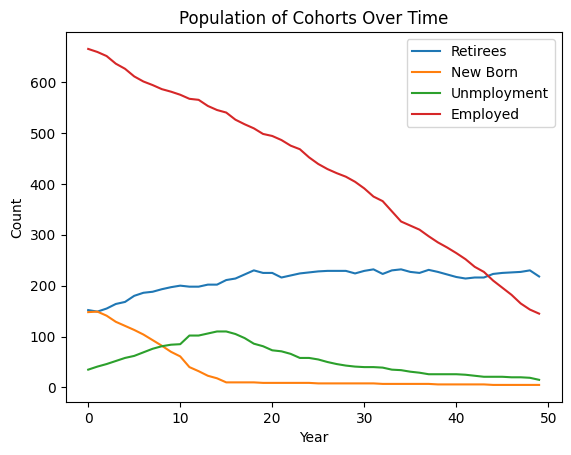

In [34]:
# The most updated version debug 1 step 1: rename the 4 cohorts

import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_dead(self):
        return self.age > 80
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize population
population_coh = []
dependent_coh = []
senior_coh = []
young_coh = []
unemp_coh = []
emp_coh = []
unem_rate = [initial_unemployment_rate]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce = list(itertools.chain(unemp_coh,emp_coh))
population_coh = list(itertools.chain(senior_coh, young_coh, unemp_coh, emp_coh))

# initial values: retirees, newborn, unemp, emp:  [152, 148, 35, 665]

# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior_coh)], [len(young_coh)], [len(unemp_coh)], [len(emp_coh)]
n = simulation_years #- 40
for year in range(1, n):
    new_population = []
    
    young_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    
    for person in population_coh:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
        
        if person.is_young():
            young_this_year += 1
            
        if 14 < person.age < 65 and person.is_unemployed():
            if random.random() < initial_unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
                        
        if 14 < person.age < 65 and person.is_employed():
            new_employment += 1
        
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    young_this_year += math.ceil((retired_this_year + unemployed_this_year + new_employment) * birth_rate)
    
    my_list = [retired_this_year, young_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
years = list(range(n))
plt.plot(years, cohorts[0], label="Retirees")
plt.plot(years, cohorts[1], label="New Born")
plt.plot(years, cohorts[2], label="Unmployment")
plt.plot(years, cohorts[3], label="Employed")
plt.title("Population of Cohorts Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

In [47]:
# The most updated version debug 1 step 2: add del_pop and add_pop functions

import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_dead(self):
        return self.age > 80
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize population
population_coh = []
dependent_coh = []
senior_coh = []
young_coh = []
unemp_coh = []
emp_coh = []
unem_rate = [initial_unemployment_rate]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce = list(itertools.chain(unemp_coh,emp_coh))
population_coh = list(itertools.chain(senior_coh, young_coh, unemp_coh, emp_coh))

# initial values: retirees, newborn, unemp, emp:  [152, 148, 35, 665]

def group_out(age, group_out):
    num1 = 0
    for person in group_out:
        if person.age == age:
            num1 += 1
            group_out.remove(person)
            
    return [num1, group_out]

def group_in(age, group_in):
    num2 = 0
    for person in group_in:
        if person.age == age:
            num2 += 1
            group_in.append(person)
            
    return [num2, group_in]

# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior_coh)], [len(young_coh)], [len(unemp_coh)], [len(emp_coh)]
n = simulation_years - 40
for year in range(1, n):
    
    new_population = []
    
    young_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    
    [count_14, young_coh] = group_out(14, young_coh)
    print('count_14: ', count_14)
    
    for person in population_coh:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
        
        if person.is_young():
            young_this_year += 1
            person.employed = False
            
        if 14 < person.age < 65 and person.is_unemployed():
            unemployed_this_year += 1
                        
        if 14 < person.age < 65 and person.is_employed():
            new_employment += 1
        
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    #print('young before at the ', year, 'th year: ', young_this_year)
    print('new born at the ', year, 'th year: ', math.ceil((retired_this_year + \
                                                            unemployed_this_year + new_employment) * birth_rate), '\n')
    young_this_year += math.ceil((retired_this_year + unemployed_this_year + new_employment) * birth_rate)
    #print('young after at the ', year, 'th year: ', young_this_year)
    my_list = [retired_this_year, young_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
print(cohorts)

count_14:  9
new born at the  1 th year:  10 

count_14:  8
new born at the  2 th year:  10 

count_14:  11
new born at the  3 th year:  10 

count_14:  8
new born at the  4 th year:  10 

count_14:  8
new born at the  5 th year:  10 

count_14:  8
new born at the  6 th year:  10 

count_14:  10
new born at the  7 th year:  10 

count_14:  10
new born at the  8 th year:  10 

count_14:  9
new born at the  9 th year:  10 

([152, 149, 155, 164, 168, 180, 186, 188, 193, 197], [148, 149, 141, 129, 121, 113, 104, 93, 82, 70], [35, 44, 52, 63, 71, 78, 85, 96, 106, 118], [665, 656, 645, 625, 613, 595, 585, 574, 561, 547])


In [38]:
(149+41+662)*birth_rate
(155+46+654)*birth_rate

9.405